In [79]:
#2変数関数
from sympy import init_printing, symbols
init_printing(use_latex='mathjax')

x,y = symbols('x y', real=True)
z = x**2 - y**2
z

 2    2
x  - y 

In [80]:
z.subs([(x,1), (y, -2)])

-3

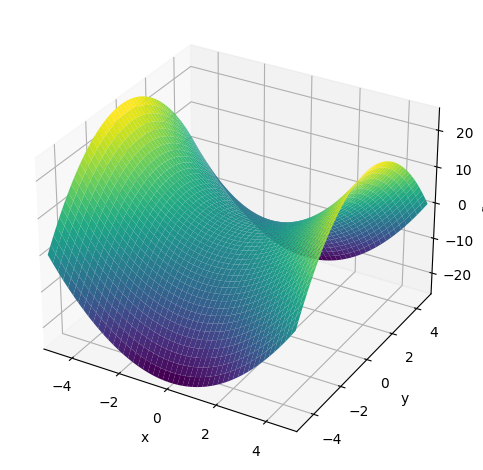

In [81]:
from sympy.plotting import plot3d

plot3d(z, (x, -5, 5), (y, -5, 5), xlabel='x', ylabel='y')

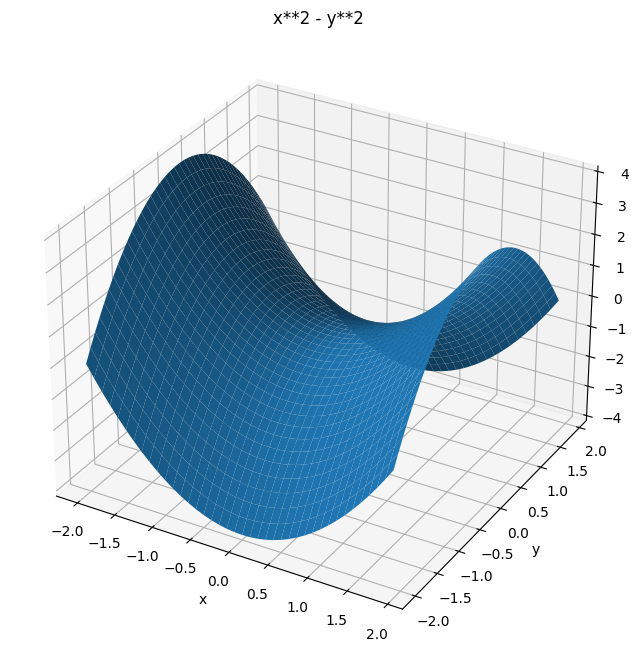

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#一次元配列を作ったあとｍ二次元配列を作る
x_val = np.arange(-2, 2,0.1)
y_val = np.arange(-2,2, 0.1)
x_val, y_val = np.meshgrid(x_val,y_val)

z_val = x_val ** 2 - y_val **2

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, title='x**2 - y**2', projection='3d')
ax.plot_surface(x_val,y_val,z_val)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

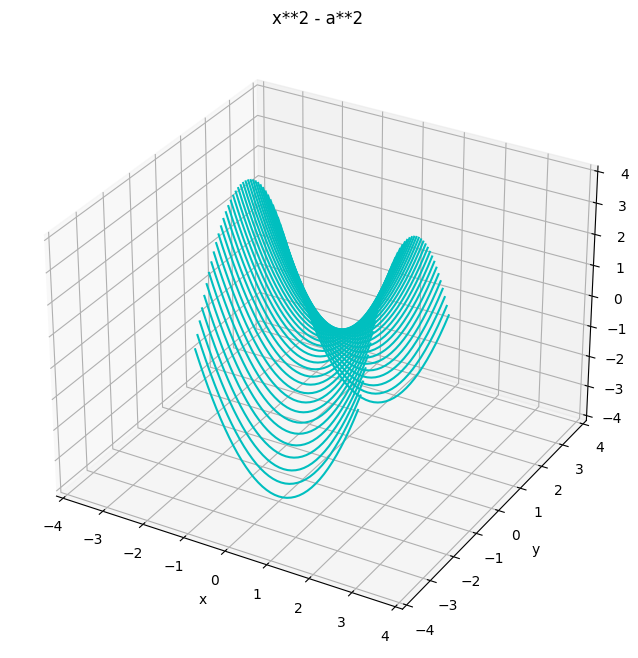

In [83]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, title='x**2 - a**2',
                     projection='3d')

for i in range(len(x_val)):
    ax.plot(x_val[i], y_val[i], z_val[i], color='c')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)

plt.show()

In [84]:
from sympy import diff

z = x**2 -y**2
#Ｘで偏微分
diff(z, x)

2⋅x

In [85]:
#yで偏微分
diff(z,y)

-2⋅y

In [86]:
z1 = -x**2 -y**2
#x方向で偏微分
diff(z1, x)

-2⋅x

In [87]:
#y方向で偏微分
diff(z1, y)

-2⋅y

## $-x^2-y^2$の偏微分

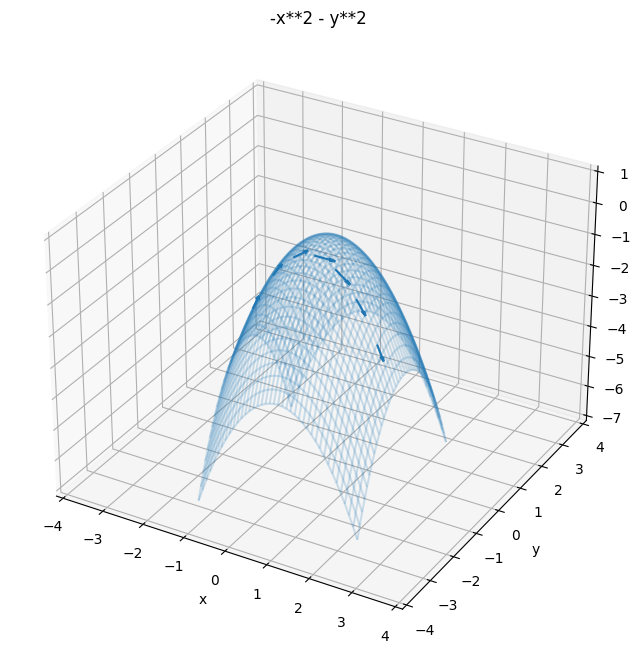

In [88]:

z1_val = -x_val**2 - y_val**2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, title='-x**2 - y**2', projection='3d')

ax.plot_wireframe(x_val, y_val, z1_val, alpha=0.2)
num_point = 7
x_min = -1.5
x_max = 1.5

y_const = -0.5

x_pos = np.linspace(x_min, x_max, num_point)
y_pos = np.full(num_point, y_const)
z_pos = -x_pos**2 - y_pos**2

dx = np.ones(num_point)
dy = np.zeros(num_point)

dz = -2*x_pos

ax.quiver(x_pos, y_pos, z_pos, dx,dy,dz, normalize=True, length=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-7,1)

plt.show()


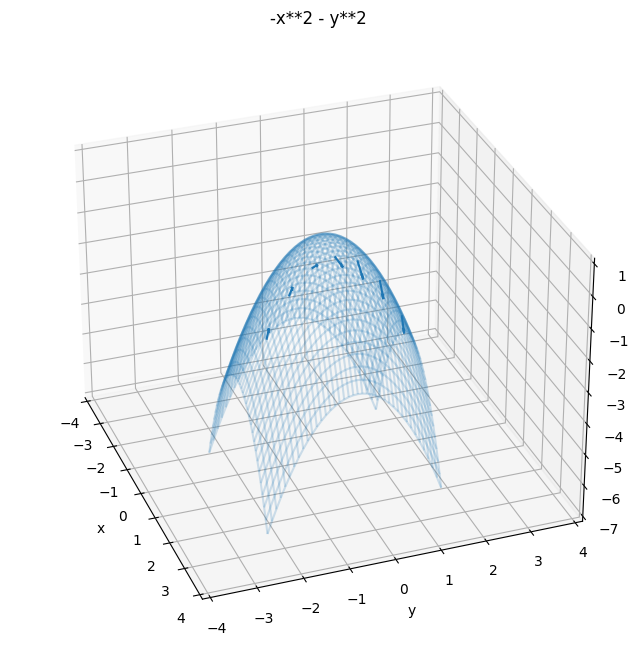

In [89]:

z1_val = -x_val**2 - y_val**2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, title='-x**2 - y**2', projection='3d')

ax.plot_wireframe(x_val, y_val, z1_val, alpha=0.2)
num_point = 7
y_min = -1.5
y_max = 1.5

x_const = 0.5

x_pos = np.full(num_point, x_const)
y_pos = np.linspace(y_min, y_max, num_point)
z_pos = -x_pos**2 - y_pos**2

dx = np.ones(num_point)
dy = np.zeros(num_point)

dz = -2*y_pos

ax.quiver(x_pos, y_pos, z_pos, dx,dy,dz, normalize=True, length=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-7,1)

ax.view_init(azim=-20)

plt.show()


## 全微分

In [90]:
z2 = -x**2 + x*y -y**2
diff(z2, x)

-2⋅x + y

In [91]:
diff(z2,y)

x - 2⋅y

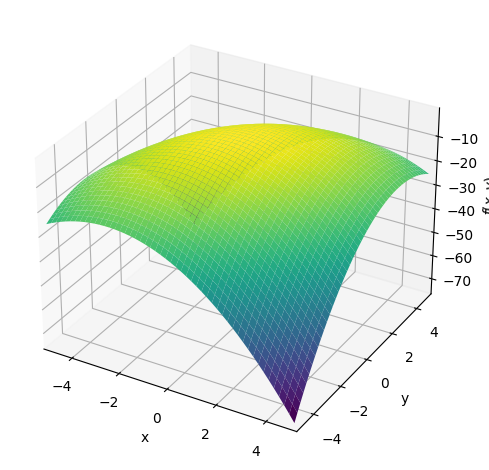

In [92]:
plot3d(z2, (x,-5,5), (y, -5,5), xlabel='x', ylabel='y')

In [93]:
def plane_tangent(z, a,b):
    pdz_x = z.diff(x).subs(((x,a), (y,b)))
    pdz_y = z.diff(y).subs(((x,a), (y,b)))

    return pdz_x*(x-a) + pdz_y*(y-b)+z.subs(((x,a), (y,b)))

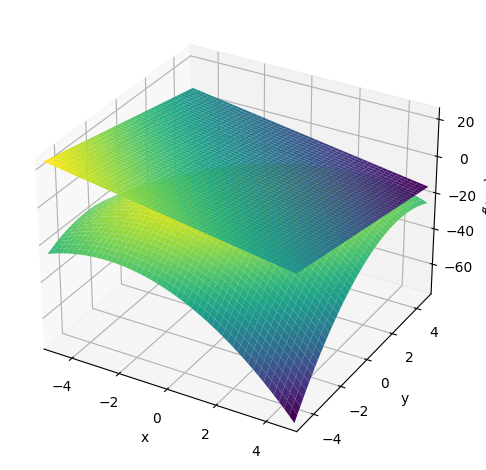

In [94]:
plot3d(z2, plane_tangent(z2, 2,2), (x,-5,5), (y,-5,5), xlabel='x', ylabel='y')

## 偏微分の応用
一次関数の極大・極小は、一次導関数が0となる点とその前後の符号を調べることで求まる。2個以上の変数を持つ関数においても同じ。<br>
極大・極小となる点において、偏微分が0になることが必要。<br>
微分可能な2変数関数$f(x,y)$は
$$\frac{\partial f}{\partial x}(a,b) = 0$$
$$\frac{\partial f}{\partial y}(a,b) = 0$$
となる点$(a,b)$で極大値・極小値を持つことができる。一階微分が0になる点を停留点という。<br>
停留点で極大・極小とならない場合があり、どちらにもならない停留点を鞍点という。

### 極値判定

$$D(a,b) = f_{xy}(a,b)^2 - f_{xx}(a,b)f_{yy}(a,b)$$
この判別式は$f(x,y)$の2階偏微分係数で構成されている。
$$f_{xx} = \frac{\partial}{\partial x}f_{x}=\frac{\partial^2}{\partial x^2}f(x,y)$$
$$f_{yy} = \frac{\partial}{\partial y}f_{x}=\frac{\partial^2}{\partial x^2}f(x,y)$$
$$f_{xy} = \frac{\partial}{\partial x}f_{y}=\frac{\partial^2}{\partial x \partial y}f(x,y)$$

- $D \lt 0$かつ$f_{xx}(a,b)\gt 0$のとき$f(x,y)$は点$(a,b)$で極小
- $D \lt 0$かつ$f_{xx}(a,b)\lt 0$のとき$f(x,y)$は点$(a,b)$で極大
- $D \gt 0$のとき極大・極小とならない


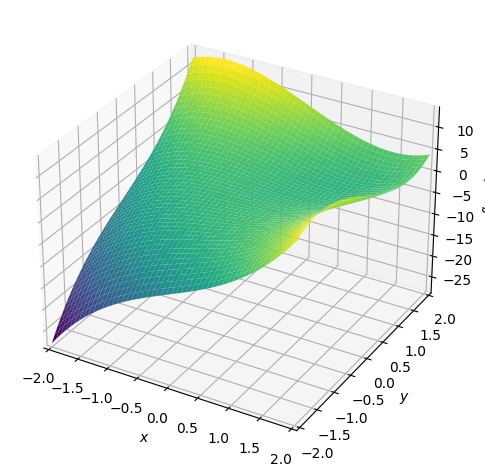

In [95]:
z3 = x**3 + y**3 -3*x*y

plot3d(z3, (x,-2,2), (y,-2,2))

In [96]:
from sympy import solve
#停留点の計算
para = solve([z3.diff(x), z3.diff(y)], [x,y])
para

[(0, 0), (1, 1)]

In [97]:
#判別式
def discrim(f,a):
    _d =(f.diff(x).diff(y))**2 - f.diff(x,2) * f.diff(y,2)
    return _d.subs([(x,a[0]), (y,a[1])])

In [98]:
discrim(z3, para[0])

9

1つ目の停留点は極大・極小ではない。

In [99]:
discrim(z3, para[1])

-27

2つの停留点は極大・極小となりそう。<br>
2階偏微分を計算して、極大・極小の判定を行う。

In [100]:
z3.diff(x,2).subs([(x,para[1][0]), (y,para[1][1])])

6

2階偏微分の極性が正であるためこの停留点は極小点なる。

In [101]:
#極小値の計算
z3.subs([(x, para[1][0]),(y,para[1][1])])

-1

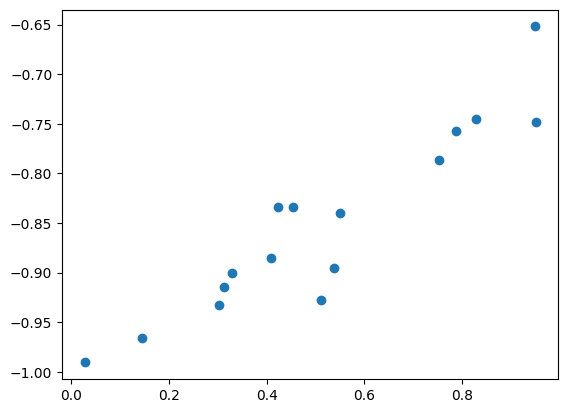

In [102]:
#最小二乗法
#ダミーデータの作成
from numpy.random import default_rng

rng =default_rng(1)

N_t = 16

x_n = rng.random(N_t)
x_n = np.sort(x_n)

t_n = 0.3 * x_n -1 + rng.normal(0, 0.03, N_t)
fig = plt.figure()
plt.scatter(x_n, t_n)

In [103]:
a, b = symbols('a b', real=True)

E = 0

for i in range(N_t):
    E = E + (t_n[i] - (a * x_n[i] + b)) ** 2
    
E = E / N_t


In [104]:
from sympy import simplify

simplify(E).evalf(1)

     2                          2              
0.3⋅a  + 1.0⋅a⋅b + 0.8⋅a + 1.0⋅b  + 2.0⋅b + 0.7

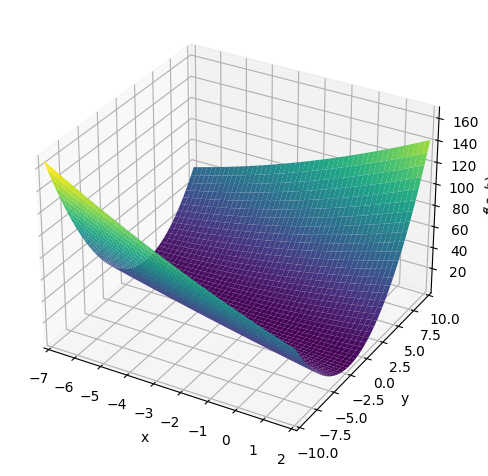

In [105]:
plot3d(E, (a, -7, 2), (b,-10,10), xlabel='x', ylabel='y')

In [106]:
#停留点の計算
para_lsm = solve([E.diff(a), E.diff(b)], (a,b))
para_lsm

{a: 0.315390450360661, b: -1.01361609289476}

ダミーデータにかけた係数とほぼ一致する。三次元のプロットで下に凸があることが判明しているため。この停留点で極小となる。

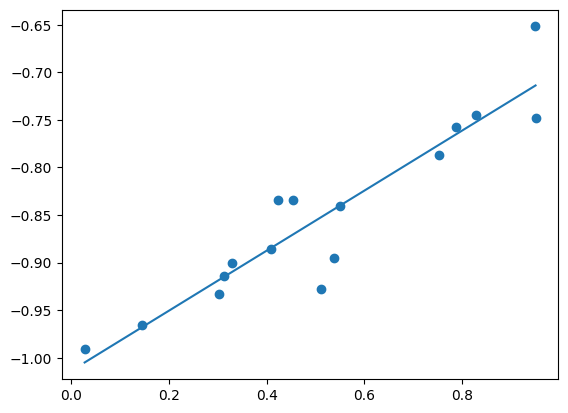

In [107]:
y_n = para_lsm[a]* x_n + para_lsm[b]
plt.scatter(x_n,t_n)
plt.plot(x_n,y_n)
plt.show()

In [108]:
#損失関数の実装
from sympy import Function, Sum
x = Function('x')
t = Function('t')

a,b = symbols('a b')
n, N = symbols('n N', integer=True)
E = Sum((t(n) - (a*x(n)+b))**2, (n,1,N)) / N
E

  N                        
 ___                       
 ╲                         
  ╲                       2
  ╱   (-a⋅x(n) - b + t(n)) 
 ╱                         
 ‾‾‾                       
n = 1                      
───────────────────────────
             N             

In [109]:
E_a = diff(E,a)
E_b = diff(E,b)

In [110]:
from sympy import expand

expand(E_a).doit()

  N                 N                N               
 ___               ___              ___              
 ╲                 ╲                ╲                
  ╲        2        ╲                ╲               
  ╱   2⋅a⋅x (n)     ╱   2⋅b⋅x(n)     ╱   -2⋅t(n)⋅x(n)
 ╱                 ╱                ╱                
 ‾‾‾               ‾‾‾              ‾‾‾              
n = 1             n = 1            n = 1             
─────────────── + ────────────── + ──────────────────
       N                N                  N         

In [111]:
expand(E_b).doit()

        N                N          
       ___              ___         
       ╲                ╲           
        ╲                ╲          
        ╱   2⋅a⋅x(n)     ╱   -2⋅t(n)
       ╱                ╱           
       ‾‾‾              ‾‾‾         
      n = 1            n = 1        
2⋅b + ────────────── + ─────────────
            N                N      

In [115]:
X, XX, TX, T = symbols('<x> <x^{2}> <tx> <t>')

In [119]:
from sympy import linsolve
eq_a = 2*XX*a + 2*X*b - 2*TX
eq_b = 2*b + 2*X*a - 2*T
sol = linsolve([eq_a, eq_b], (a, b))
sol


⎧⎛ <t>⋅<x> - <tx>  -<t>⋅<x__{2}> + <tx>⋅<x>⎞⎫
⎪⎜───────────────, ────────────────────────⎟⎪
⎨⎜   2                    2                ⎟⎬
⎪⎝<x>  - <x__{2}>      <x>  - <x__{2}>     ⎠⎪
⎩                                           ⎭

In [120]:
X_val = np.average(x_n)
T_val = np.average(t_n)

XX_val =np.average(x_n**2)
TX_val = np.average(t_n*x_n)

sol.subs(((X,X_val), (T, T_val), (XX, XX_val), (TX, TX_val)))


{(0.315390450360657, -1.01361609289476)}